In [32]:
import numpy as np
import numpy.fft as fft
from matplotlib import pyplot as plt
import h5py

#### Grab a cutout

In [5]:
with h5py.File('LLC_modis2012_test_preproc.h5', 'r') as f:
    img = f['valid'][0, 0, ...]

In [6]:
img

array([[ 1.7890244 ,  1.7860222 ,  1.781023  , ...,  0.14502335,
         0.02602386, -0.11197662],
       [ 1.7850227 ,  1.7840233 ,  1.781023  , ...,  0.13202286,
         0.01602364, -0.13197708],
       [ 1.7860222 ,  1.7860222 ,  1.7830238 , ...,  0.09102249,
        -0.05197525, -0.21497726],
       ...,
       [-0.20697784, -0.21497726, -0.22497559, ..., -1.1709766 ,
        -1.2199764 , -1.3059769 ],
       [-0.18297577, -0.19397736, -0.2079773 , ..., -1.2129765 ,
        -1.270977  , -1.3469772 ],
       [-0.14097595, -0.15297699, -0.17097664, ..., -1.2559776 ,
        -1.3149757 , -1.3749771 ]], dtype=float32)

In [11]:
dim = 0
N = img.shape[dim]
N

64

In [41]:
if N%2 != 0: 
    L = int( (N-1)/2 + 1 )
else: 
    L = int(N/2 + 1)

In [42]:
L

33

#### Plot along first row

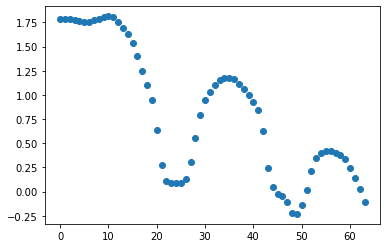

In [25]:
y = img[0, :]
x = np.arange(0, y.shape[0], 1)

ax = plt.scatter(x, y)

## Detrend and demean

In [26]:
x = np.arange(0, y.shape[0], 1)
pp = np.polyfit( x, y, 1)
Temp = y - np.polyval(pp, x)
y_mod = Temp - np.mean(Temp) # might need to find a way to omit nan numbers


#### Plot polyfit

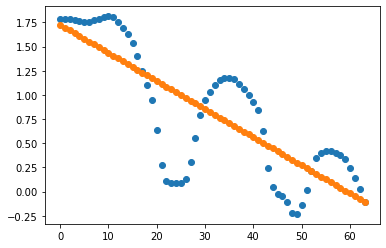

In [27]:
ax = plt.scatter(x, y)
ax = plt.scatter(x, np.polyval(pp,x))

#### Plot detrended

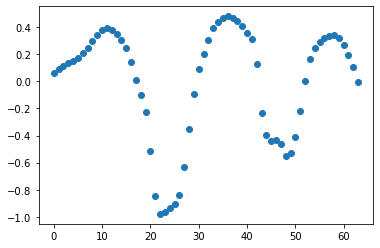

In [29]:
ax = plt.scatter(x, Temp)

#### Plot demeaned

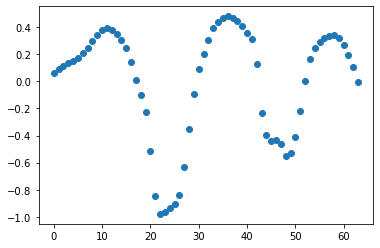

In [30]:
ax = plt.scatter(x, y_mod)

In [64]:
array = img.copy()
mod_array = np.empty_like(array)

In [65]:
for row in range(N):
    y = array[row, :]
    x = np.arange(0, y.shape[0], 1)
    pp = np.polyfit( x, y, 1)
    Temp = y - np.polyval(pp, x)
    mod_array[row, :] = Temp - np.mean(Temp) # might need to find a way to omit nan numbers



## Spectrum

In [66]:
FFT = fft.fft(a=mod_array, axis=dim)

In [76]:
f= FFT[0:L-1]
PSD_Temp = np.abs(f.dot(np.conj(f).T))
PSD_Mean = np.mean(PSD_Temp, 1)

In [78]:
PSD_Mean.shape

(32,)

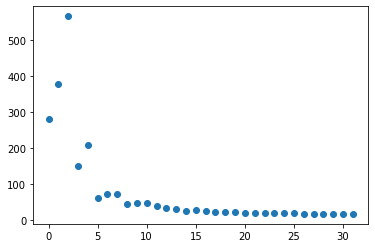

In [79]:
x_mod = np.arange(0, PSD_Mean.shape[0], 1)
ax = plt.scatter(x_mod, PSD_Mean)

In [80]:
Fundamental = 1 / (N * 2)

In [81]:
Fundamental

0.0078125

In [82]:
1/ (128)

0.0078125

In [88]:
Wavenumber = [i * Fundamental for i in range(L-1)]

#### matplotlib.mlab.psd

In [109]:
from matplotlib import mlab

In [120]:
x = np.linspace(0, 4*np.pi, 100)
y = np.sin(4*x)

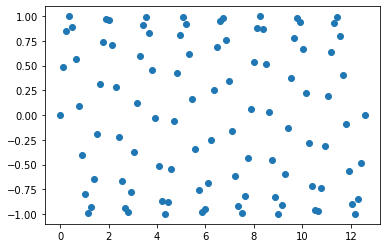

In [121]:
ax = plt.scatter(x, y)

In [134]:
p = mlab.psd(y_mod, Fs=0.5, NFFT = 64, detrend = 'none')

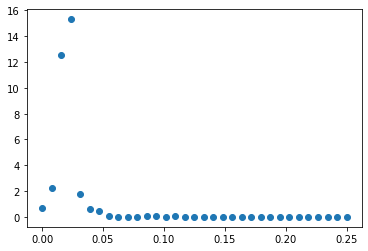

In [135]:
ax = plt.scatter(p[1], p[0])